[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

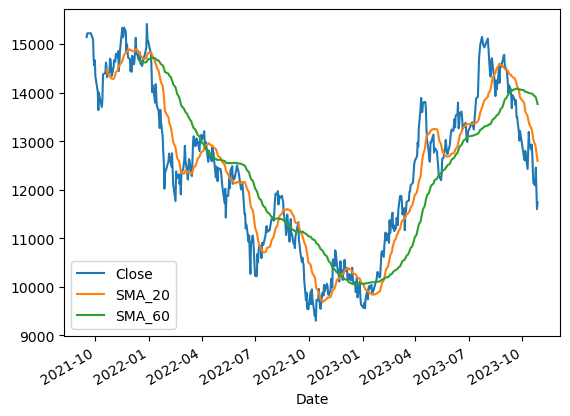

In [12]:
import talib
import yfinance as yf

# 데이터 다운로드
stock_data = yf.download('229200.KS')

# 최근 500일 데이터만 가져오기 (복사본 생성)
stock_data = stock_data.tail(500).copy()

# SMA 계산 및 할당
stock_data['SMA_20'] = talib.SMA(stock_data['Close'], 20)
stock_data['SMA_60'] = talib.SMA(stock_data['Close'], 60)

# 차트 표시
stock_data[['Close', 'SMA_20', 'SMA_60']].plot()


In [13]:
stock_data['RSI_14'] = talib.RSI(stock_data['Close'], 14)
stock_data['RSI_14'].fillna(0, inplace=True)


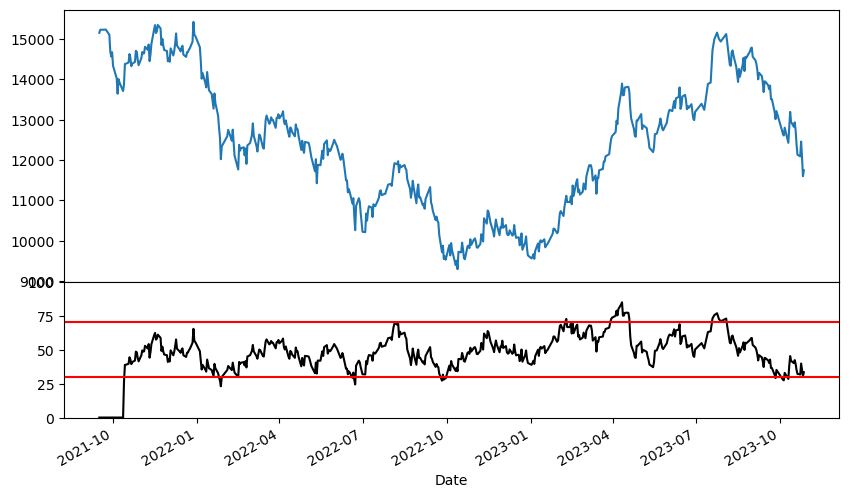

In [14]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
fig, ax = plt.subplots(figsize=(10, 6), sharex=True)
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[2,1])

# 주가 나타내기
ax1 = plt.subplot(gs[0])
ax1 = stock_data['Close'].plot()
ax1.set_xlabel('')
ax1.axes.xaxis.set_ticks([])

#RSI 나타내기
ax2 = plt.subplot(gs[1])
ax2 = stock_data['RSI_14'].plot(color = 'black', ylim=[0,100])
ax2.axhline(y=70, color = 'r', linestyle = '-')
ax2.axhline(y=30, color = 'r', linestyle = '-')
ax2.set_xlabel
plt.subplots_adjust(wspace=0, hspace=0)

<AxesSubplot:xlabel='Date'>

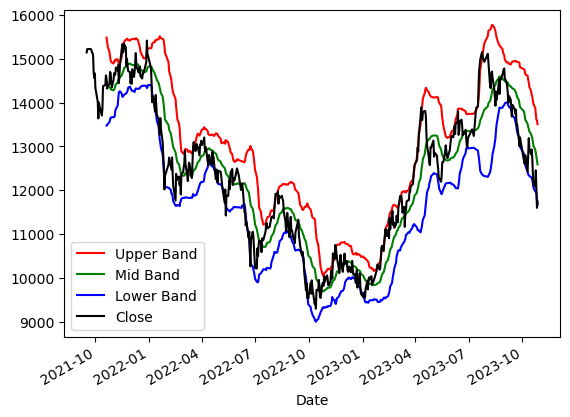

In [15]:
import pandas as pd
upper_2sd, mid_2sd, lower_2sd = talib.BBANDS(stock_data['Close'], 
                                             nbdevup=2,
                                             nbdevdn=2,
                                             timeperiod=20)
bb = pd.concat([upper_2sd, mid_2sd, lower_2sd, stock_data['Close']], axis=1)
bb.columns = ['Upper Band', 'Mid Band', 'Lower Band', 'Close']

bb.plot(color={
    'Upper Band': 'red',
    'Lower Band': 'blue',
    'Mid Band': 'green',
    'Close': 'black'
})

[*********************100%***********************]  1 of 1 completed


C:\Users\성현태\AppData\Local\Temp\ipykernel_19276\1891165210.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


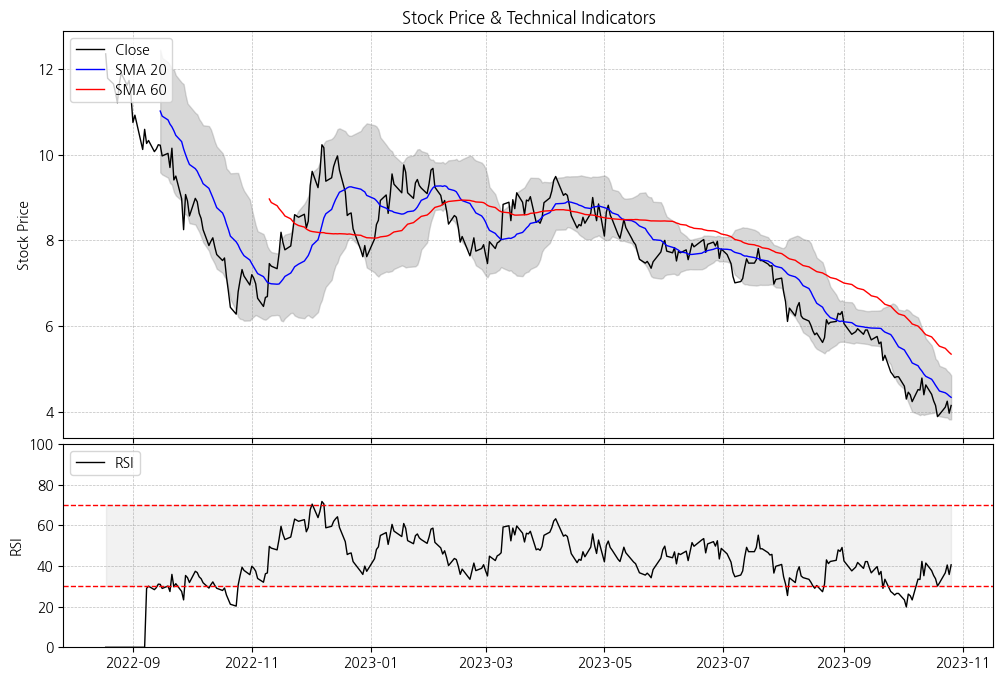

In [20]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import talib
import yfinance as yf
import pandas as pd

# 데이터 다운로드
stock_data = yf.download('TMF')

# 최근 500일 데이터만 가져오기 (복사본 생성)
stock_data = stock_data.tail(300).copy()

# SMA 계산 및 할당
stock_data['SMA_20'] = talib.SMA(stock_data['Close'], 20)
stock_data['SMA_60'] = talib.SMA(stock_data['Close'], 60)

# RSI 계산
stock_data['RSI_14'] = talib.RSI(stock_data['Close'], 14)
stock_data['RSI_14'].fillna(0, inplace=True)

# 볼린저 밴드 계산
upper_2sd, mid_2sd, lower_2sd = talib.BBANDS(stock_data['Close'], nbdevup=2, nbdevdn=2, timeperiod=20)
bb = pd.concat([upper_2sd, mid_2sd, lower_2sd, stock_data['Close']], axis=1)
bb.columns = ['Upper Band', 'Mid Band', 'Lower Band', 'Close']

# 그래프 설정
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[2,1], hspace=0.02)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1], sharex=ax1) # ax1과 x축을 공유

# 주가 및 이동평균선 그리기
ax1.plot(stock_data.index, stock_data['Close'], label='Close', color='black', lw=1)
ax1.plot(stock_data.index, stock_data['SMA_20'], label='SMA 20', color='blue', lw=1)
ax1.plot(stock_data.index, stock_data['SMA_60'], label='SMA 60', color='red', lw=1)
ax1.fill_between(stock_data.index, bb['Lower Band'], bb['Upper Band'], color='grey', alpha=0.3)
ax1.set_title('Stock Price & Technical Indicators')
ax1.set_ylabel('Stock Price')
ax1.legend(loc='upper left')
ax1.grid(True, color='grey', linestyle='--', linewidth=0.5, alpha=0.5)

# RSI 그리기
ax2.plot(stock_data.index, stock_data['RSI_14'], label='RSI', color='black', lw=1)
ax2.axhline(y=70, color='red', linestyle='--', lw=1)
ax2.axhline(y=30, color='red', linestyle='--', lw=1)
ax2.fill_between(stock_data.index, y1=30, y2=70, color='grey', alpha=0.1)
ax2.set_ylabel('RSI')
ax2.set_ylim(0, 100)
ax2.legend(loc='upper left')
ax2.grid(True, color='grey', linestyle='--', linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.show()

In [2]:
import yfinance as yf
aa = yf.download('000020.KS')

[*********************100%***********************]  1 of 1 completed


In [3]:
aa.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,2658.120361,3110.566406,2658.120361,3110.566406,2519.724365,898582
2000-01-05,3167.122314,3572.438477,2940.899170,3299.085693,2672.434570,3865389
2000-01-06,3299.085693,3468.752930,2808.935791,2865.491455,2321.199707,1382352
2000-01-07,2978.603027,3289.659668,2827.787842,3289.659668,2664.799072,2402938
2000-01-10,3638.420166,3694.976074,3157.696289,3204.826172,2596.079346,3993227


In [4]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5974 entries, 2000-01-04 to 2023-10-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5974 non-null   float64
 1   High       5974 non-null   float64
 2   Low        5974 non-null   float64
 3   Close      5974 non-null   float64
 4   Adj Close  5974 non-null   float64
 5   Volume     5974 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 326.7 KB


In [9]:
import talib
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

# 데이터 다운로드
# stock_data = yf.download('229200.KS')
data = pd.read_csv('price_ver_final.csv')


In [27]:
data['종목코드'] = data['종목코드'].astype(str).str.zfill(6)
stock_data = data[data['종목코드']=='005930']
name = pd.read_csv('fs_ver_3.0.csv')
name['티커'] = name['티커'].astype(str).str.zfill(6)
code_name = name[name['티커']=='005930']['회사명'].unique()
# 최근 500일 데이터만 가져오기 (복사본 생성)
stock_data = stock_data.tail(500).copy()


C:\Users\성현태\AppData\Local\Temp\ipykernel_18172\2221728357.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


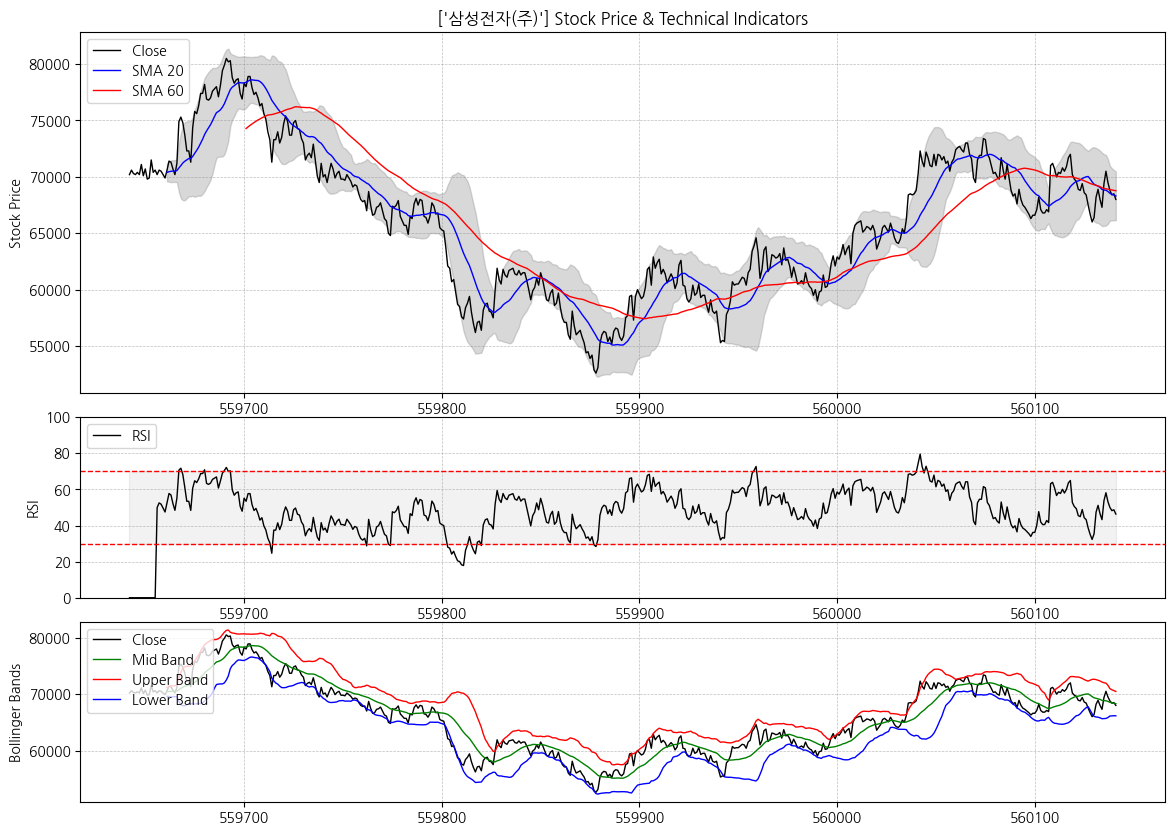

In [28]:
import matplotlib.font_manager
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
[matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if 'Nanum' in font]
plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False
# SMA 계산 및 할당
stock_data['SMA_20'] = talib.SMA(stock_data['Close'], 20)
stock_data['SMA_60'] = talib.SMA(stock_data['Close'], 60)

# RSI 계산
stock_data['RSI_14'] = talib.RSI(stock_data['Close'], 14)
stock_data['RSI_14'].fillna(0, inplace=True)

# 볼린저 밴드 계산
upper_2sd, mid_2sd, lower_2sd = talib.BBANDS(stock_data['Close'], nbdevup=2, nbdevdn=2, timeperiod=20)

# 그래프 설정
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(nrows=3, ncols=1, height_ratios=[2,1,1], hspace=0.1)

# 주가 및 이동평균선 그리기
ax1 = plt.subplot(gs[0])
ax1.plot(stock_data.index, stock_data['Close'], label='Close', color='black', lw=1)
ax1.plot(stock_data.index, stock_data['SMA_20'], label='SMA 20', color='blue', lw=1)
ax1.plot(stock_data.index, stock_data['SMA_60'], label='SMA 60', color='red', lw=1)
ax1.fill_between(stock_data.index, lower_2sd, upper_2sd, color='grey', alpha=0.3)
ax1.set_title(f'{code_name} Stock Price & Technical Indicators')
ax1.set_ylabel('Stock Price')
ax1.legend(loc='upper left')
ax1.grid(True, color='grey', linestyle='--', linewidth=0.5, alpha=0.5)

# RSI 그리기
ax2 = plt.subplot(gs[1], sharex=ax1)
ax2.plot(stock_data.index, stock_data['RSI_14'], label='RSI', color='black', lw=1)
ax2.axhline(y=70, color='red', linestyle='--', lw=1)
ax2.axhline(y=30, color='red', linestyle='--', lw=1)
ax2.fill_between(stock_data.index, y1=30, y2=70, color='grey', alpha=0.1)
ax2.set_ylabel('RSI')
ax2.set_ylim(0, 100)
ax2.legend(loc='upper left')
ax2.grid(True, color='grey', linestyle='--', linewidth=0.5, alpha=0.5)

# 볼린저 밴드 그리기
ax3 = plt.subplot(gs[2], sharex=ax1)
ax3.plot(stock_data.index, stock_data['Close'], label='Close', color='black', lw=1)
ax3.plot(stock_data.index, mid_2sd, label='Mid Band', color='green', lw=1)
ax3.plot(stock_data.index, upper_2sd, label='Upper Band', color='red', lw=1)
ax3.plot(stock_data.index, lower_2sd, label='Lower Band', color='blue', lw=1)
ax3.set_ylabel('Bollinger Bands')
ax3.legend(loc='upper left')
ax3.grid(True, color='grey', linestyle='--', linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed


C:\Users\성현태\AppData\Local\Temp\ipykernel_19276\780316074.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


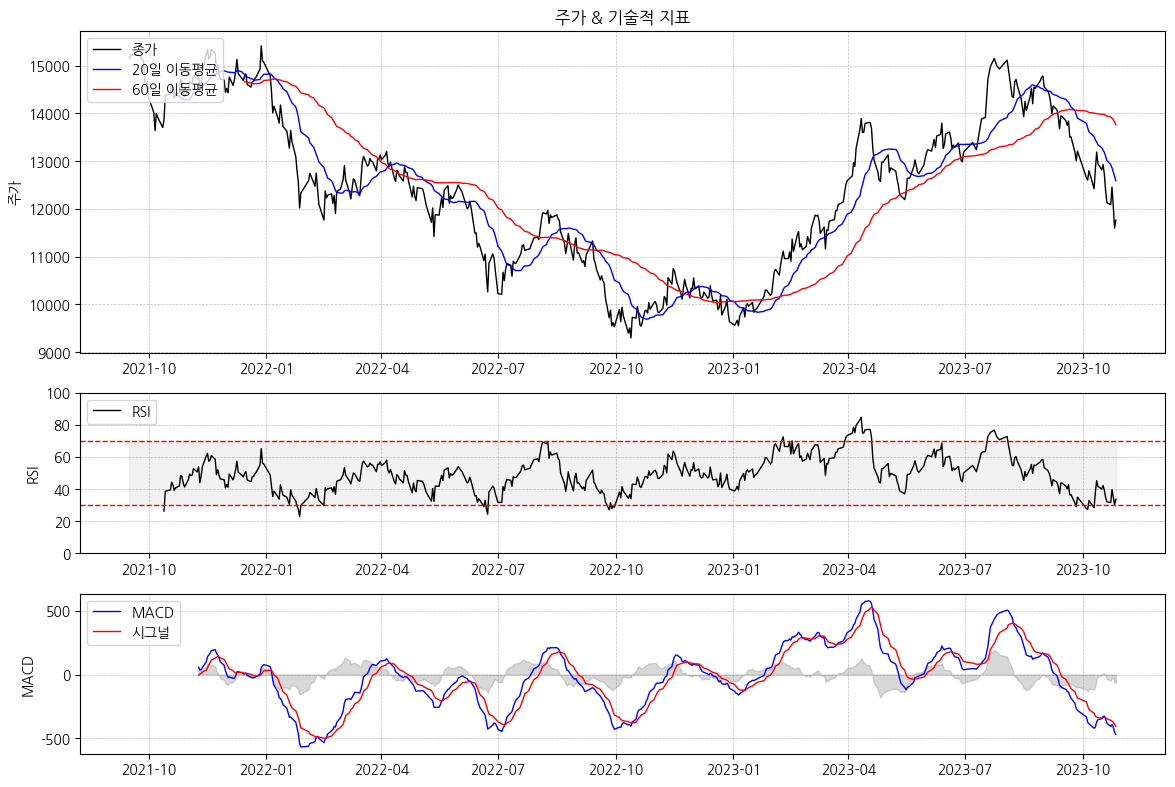

In [18]:
import talib
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import matplotlib.font_manager
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
[matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if 'Nanum' in font]
plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False

# 데이터 다운로드
stock_data = yf.download('229200.KS')

# 최근 500일 데이터만 가져오기 (복사본 생성)
stock_data = stock_data.tail(500).copy()

# SMA 계산 및 할당
stock_data['20일 이동평균'] = talib.SMA(stock_data['Close'], 20)
stock_data['60일 이동평균'] = talib.SMA(stock_data['Close'], 60)

# RSI 계산
stock_data['RSI'] = talib.RSI(stock_data['Close'], 14)

# MACD 계산
stock_data['MACD'], stock_data['MACD Signal'], _ = talib.MACD(stock_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# 그래프 설정
fig = plt.figure(figsize=(14, 12))
gs = gridspec.GridSpec(nrows=4, ncols=1, height_ratios=[2,1,1,1], hspace=0.2)

# 주가 및 이동평균선 그리기
ax1 = plt.subplot(gs[0])
ax1.plot(stock_data.index, stock_data['Close'], label='종가', color='black', lw=1)
ax1.plot(stock_data.index, stock_data['20일 이동평균'], label='20일 이동평균', color='blue', lw=1)
ax1.plot(stock_data.index, stock_data['60일 이동평균'], label='60일 이동평균', color='red', lw=1)
ax1.set_title('주가 & 기술적 지표')
ax1.set_ylabel('주가')
ax1.legend(loc='upper left')
ax1.grid(True, color='grey', linestyle='--', linewidth=0.5, alpha=0.5)

# RSI 그리기
ax2 = plt.subplot(gs[1], sharex=ax1)
ax2.plot(stock_data.index, stock_data['RSI'], label='RSI', color='black', lw=1)
ax2.axhline(y=70, color='red', linestyle='--', lw=1)
ax2.axhline(y=30, color='red', linestyle='--', lw=1)
ax2.fill_between(stock_data.index, y1=30, y2=70, color='grey', alpha=0.1)
ax2.set_ylabel('RSI')
ax2.set_ylim(0, 100)
ax2.legend(loc='upper left')
ax2.grid(True, color='grey', linestyle='--', linewidth=0.5, alpha=0.5)

# MACD 그리기
ax3 = plt.subplot(gs[2], sharex=ax1)
ax3.plot(stock_data.index, stock_data['MACD'], label='MACD', color='blue', lw=1)
ax3.plot(stock_data.index, stock_data['MACD Signal'], label='시그널', color='red', lw=1)
ax3.fill_between(stock_data.index, stock_data['MACD'] - stock_data['MACD Signal'], color='grey', alpha=0.3)
ax3.set_ylabel('MACD')
ax3.legend(loc='upper left')
ax3.grid(True, color='grey', linestyle='--', linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.show()
